Preprocessing

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [48]:
# Read files
data_client = pd.read_csv('data_files/client.csv')
data_invoice = pd.read_csv('data_files/invoice.csv')

In [55]:
# Looking at header and data
print(data_client.head())

print(data_client.count())


   region        date  dis    id  catg  target
0     101  31/12/1994   60     0    11       0
1     107   29/5/2002   69     1    11       0
2     301   13/3/1986   62    10    11       0
3     105   11/7/1996   69   100    11       0
4     303  14/10/2014   62  1000    11       0
region    21652
date      21652
dis       21652
id        21652
catg      21652
target    21652
dtype: int64


In [56]:
print(data_invoice.head())

print(data_invoice.count())

   id        date  tarif_type  counter_statue  reading_remarque  \
0   0   24/3/2014          11               0                 8   
1   0   29/3/2013          11               0                 6   
2   0   23/3/2015          11               0                 8   
3   0   13/7/2015          11               0                 8   
4   0  17/11/2016          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0                     0              4         ELEC                    1   
1                     0              4         ELEC                    1   
2                     0              4         ELEC                    1   
3                     0              4         ELEC                    1   
4                     0             12         ELEC                    1   

   consommation_level_1  consommation_level_2  consommation_level_3  
0                    82                     0                     0  


In [20]:
# Check for missing data in client
data_client.isna().any()

region    False
date      False
dis       False
id        False
catg      False
target    False
dtype: bool

In [15]:
# Check for missing data in invoice
data_invoice.isna().any()

id                      False
date                    False
tarif_type              False
counter_statue          False
reading_remarque        False
consommation_level_4    False
months_number           False
counter_type            False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
dtype: bool

There are no missing values in the dataset

In [58]:
# Drop duplicates
data_client.drop_duplicates(inplace=True)
data_invoice.drop_duplicates(inplace=True)


In [65]:
# Convert date column to datetime
data_client['date'] = pd.to_datetime(data_client['date'])

# Extract year, month, and tenure
data_client['year_joined'] = data_client['date'].dt.year
data_client['month_joined'] = data_client['date'].dt.month
data_client['tenure'] = (pd.to_datetime('today') - data_client['date']).dt.days

# Convert to datetime and extract features
data_invoice['date'] = pd.to_datetime(data_invoice['date'])
data_invoice['year'] = data_invoice['date'].dt.year
data_invoice['month'] = data_invoice['date'].dt.month
data_invoice['days_since_last_invoice'] = data_invoice['date'].diff().dt.days

print(data_client.head())
print(data_invoice.head())


   region       date  dis    id  catg  target  year_joined  month_joined  \
0     101 1994-12-31   60     0    11       0         1994            12   
1     107 2002-05-29   69     1    11       0         2002             5   
2     301 1986-03-13   62    10    11       0         1986             3   
3     105 1996-07-11   69   100    11       0         1996             7   
4     303 2014-10-14   62  1000    11       0         2014            10   

   tenure  
0   10882  
1    8176  
2   14097  
3   10324  
4    3655  
   id       date  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  

In [68]:
# Standardising numeric variables
data_invoice[['counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']] = StandardScaler().fit_transform(data_invoice[['counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']])

print(data_invoice.head())

   id       date  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0             -0.052334              4         ELEC            -0.003262   
1             -0.052334              4         ELEC            -0.003262   
2             -0.052334              4         ELEC            -0.003262   
3             -0.052334              4         ELEC            -0.003262   
4             -0.052334             12         ELEC            -0.003262   

   consommation_level_1  consommation_level_2  consommation_level_3  year  \
0             -0.609700             -0.086277             -0.131753  

<BarContainer object of 2 artists>

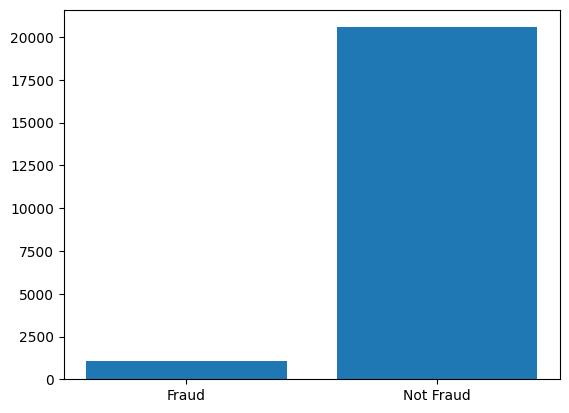

In [69]:
# Visualise dependent variable
fraud_c = data_client[data_client['target'] == 1]
not_fraud_c = data_client[data_client['target'] == 0]


plt.bar(['Fraud', 'Not Fraud'], [len(fraud_c), len(not_fraud_c)])

Significantly larger number of clients are not fraudulent compare to fraudulent clients, showcasing an imbalance dataset.